 Written by Chang Du
 
 NYU CUSP PUI2018
 
 Assignment 1_Homework 4

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and a _Geometric_ distribution.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [151]:
from __future__ import print_function
__author__= 'Chang Du'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [152]:
distributions = ['chisq', 'normal','pois','binomial','geo']

## and which mean to give it

In [153]:
mymean = 100

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [154]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

In [155]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation.  (编程规范)
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary

# I. Chi Squre Distribution 

- ## An Example for Chi Squre Distribution

In [156]:
md['chisq'] = np.random.chisquare(df, size=1000)
# md now is a dictionary with one object: an array by the key 'chisq'
# md['chisq'] contains 100 numbers which in chisq distribution

Text(0.5,1,"Figure1: An Example: Histogram of Chi Squre Distribution's sample means")

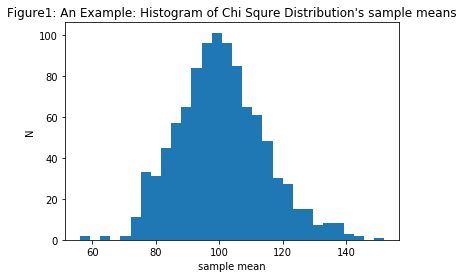

In [157]:
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('sample mean')
pl.title("Figure1: An Example: Histogram of Chi Squre Distribution's sample means")

### Figure 1: An example for Chi sq distribution with same sample size of 1000: sample mean df = 100, N=1000. The distribution of these sample means tends to be a Normal Distribution.

### let numpy calculate what the mean and stdev of this distribution are

In [158]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.54, standard deviation: 13.91


- ## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [186]:
# mysize = (2000 / (np.array(range(1,101)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 2000).astype(int)
mysize = np.linspace(11, 1999, 100, dtype=int)
print (mysize, mysize.shape)

[  11   31   51   71   91  111  131  151  171  191  211  231  251  272
  292  312  332  352  372  392  412  432  452  472  492  513  533  553
  573  593  613  633  653  673  693  713  733  753  774  794  814  834
  854  874  894  914  934  954  974  994 1015 1035 1055 1075 1095 1115
 1135 1155 1175 1195 1215 1235 1256 1276 1296 1316 1336 1356 1376 1396
 1416 1436 1456 1476 1496 1517 1537 1557 1577 1597 1617 1637 1657 1677
 1697 1717 1737 1758 1778 1798 1818 1838 1858 1878 1898 1918 1938 1958
 1978 1999] (100,)


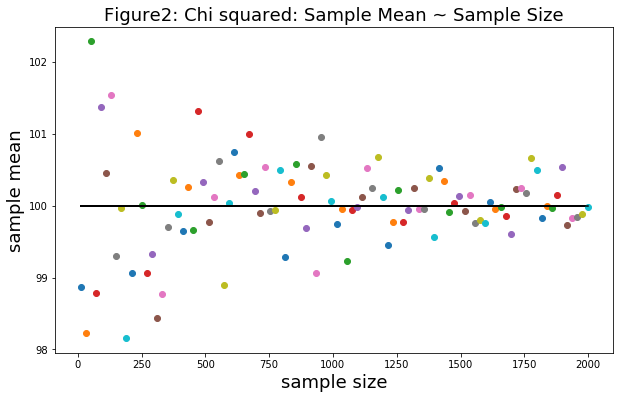

In [187]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

# md is a dictionary, the distibutions in md like md['chisq'] is also a dictionary, so it's a nested dictionary.
# {'chisq': {'size1': array, "size2": array2..., "means": {'size1': size1_mean...}}, 'lnorm': {}}
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    #print (nn)
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Figure2: Chi squared: Sample Mean ~ Sample Size', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')# the single line

### Figure 2: This is a plot of Sample mean against Sample size for Chi Squre Distribution. The sample means tend to approaching the stated population mean (df = mymean) with the increase of sample size. It follows the law of large numbers.

- # now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0.5,1,"Figure3: Histogram of Chi Squre Distribution's sample means")

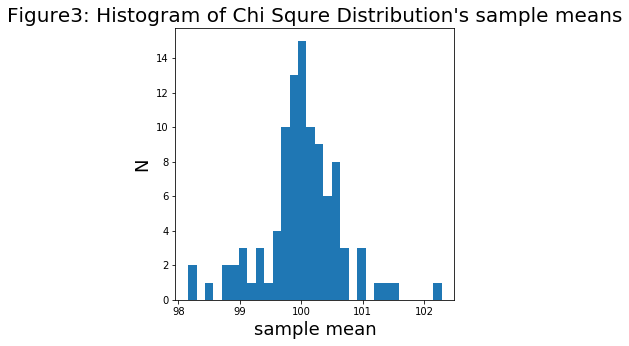

In [199]:
allmeans_Chisq = list(md['chisq']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans_Chisq,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Figure3: Histogram of Chi Squre Distribution's sample means", fontsize = 20)

### Figure 3: This is a histogram of all the 100 Chi Squre Distribution's sample means. The distribution of these sample means tends to be a Normal Distribution.

# II. Normal distribution


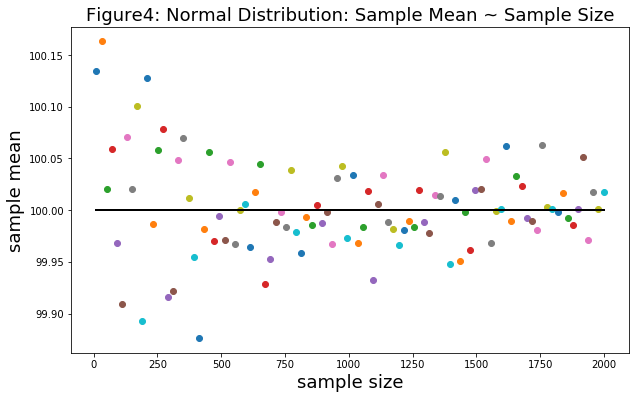

In [189]:
md['normal'] = {} 
mu = mymean

for n in mysize:
    md['normal'][n] = np.random.normal(mu,size=n,scale=1.0)
    
# save the means for plotting later    
md['normal']['means'] = {}
normal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        normal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        normal_mu_n.set_xlabel('sample size', fontsize=18)
        normal_mu_n.set_ylabel('sample mean', fontsize=18)
        normal_mu_n.set_title('Figure4: Normal Distribution: Sample Mean ~ Sample Size', fontsize=18)
        normal_mu_n.plot([min(mysize), max(mysize)], [mu, mu], 'k')

### Figure 4: This is a plot of Sample mean against Sample size for Normal Distribution. The sample means tend to approaching the stated population mean (df = mymean) with the increase of sample size. It follows the law of large numbers.

Text(0.5,1,"Figure5: Histogram of Normal Distribution's sample means")

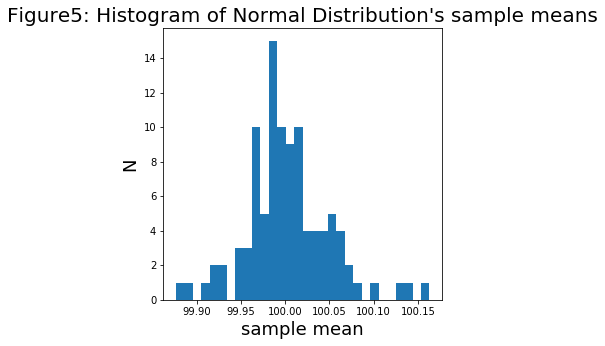

In [200]:
allmeans_normal = list(md['normal']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans_normal,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Figure5: Histogram of Normal Distribution's sample means", fontsize = 20)

### Figure 5: This is a histogram of all the 100 Normal Distribution's sample means. The distribution of these sample means tends to be a Normal Distribution.

# III. Poisson Distribution 

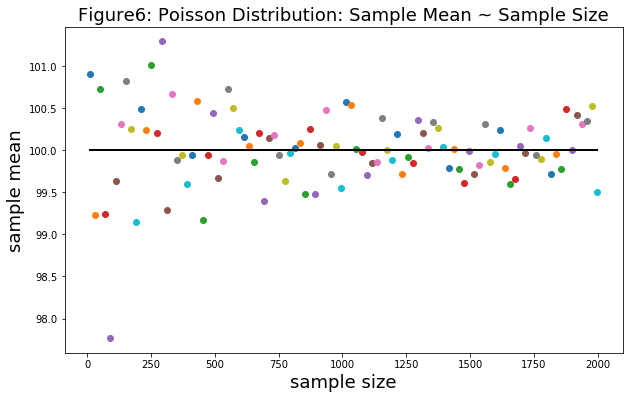

In [191]:
md['pois'] = {} 
lam = mymean
for n in mysize:
    md['pois'][n] = np.random.poisson(lam,size=n)
    
# save the means for plotting later    
md['pois']['means'] = {}
pois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        pois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        pois_mu_n.set_xlabel('sample size', fontsize=18)
        pois_mu_n.set_ylabel('sample mean', fontsize=18)
        pois_mu_n.set_title('Figure6: Poisson Distribution: Sample Mean ~ Sample Size', fontsize=18)
        pois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')

### Figure 6: This is a plot of Sample mean against Sample size for Poisson Distribution. The sample means tend to approaching the stated population mean (df = mymean) with the increase of sample size. It follows the law of large numbers.

Text(0.5,1,"Figure7: Histogram of Poisson Distribution's sample means")

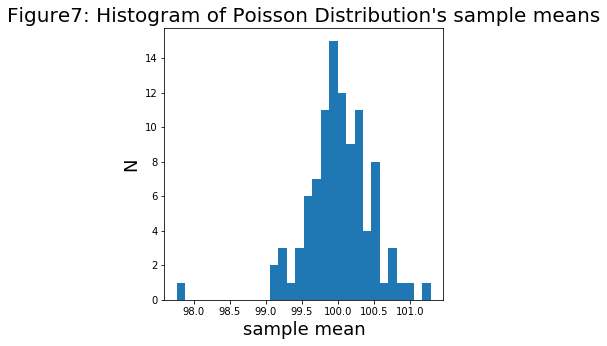

In [201]:
allmeans_pois = list(md['pois']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans_pois,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Figure7: Histogram of Poisson Distribution's sample means", fontsize = 20)

### Figure 7: This is a histogram of all the 100 Poisson Distribution's sample means. The distribution of these sample means tends to be a Normal Distribution.

# IV. Binomial distribution

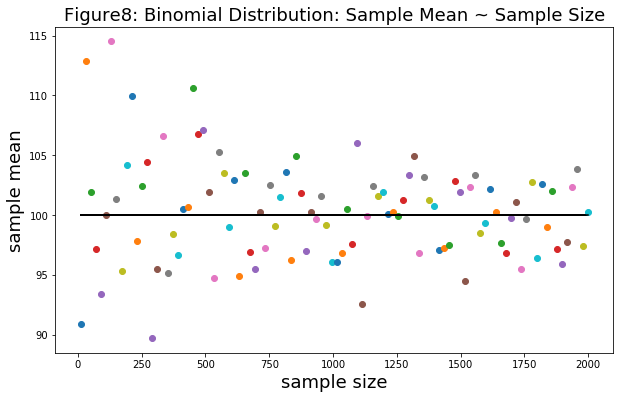

In [193]:
md['binomial'] = {} 

for n in mysize:
    md['binomial'][n] = 100*np.random.binomial(5,p=0.2,size=n)
# n*p = mymean, n<N (10<N<2000), p<1 (n is not the samplesize here, n=5 here)
    
# save the means for plotting later    
md['binomial']['means'] = {}
binomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        binomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        binomial_mu_n.set_xlabel('sample size', fontsize=18)
        binomial_mu_n.set_ylabel('sample mean', fontsize=18)
        binomial_mu_n.set_title('Figure8: Binomial Distribution: Sample Mean ~ Sample Size', fontsize=18)
        binomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 8: This is a plot of Sample mean against Sample size for Binomial Distribution. The sample means tend to approaching the stated population mean (df = mymean) with the increase of sample size. It follows the law of large numbers.

Text(0.5,1,"Figure9: Histogram of Binomial Distribution's sample means")

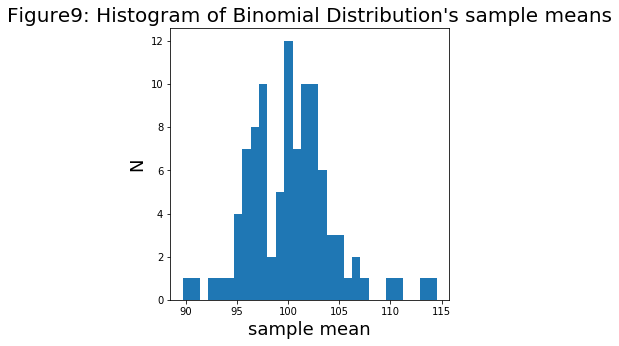

In [202]:
allmeans_binomial = list(md['binomial']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans_binomial,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Figure9: Histogram of Binomial Distribution's sample means", fontsize = 20)

### Figure 9: This is a histogram of all the 100 Binomial Distribution's sample means. The distribution of these sample means tends to be a Normal Distribution.

# V. Geometric distribution

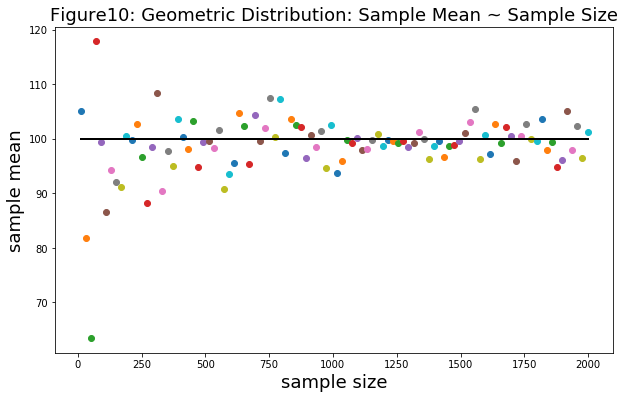

In [195]:
md['geo'] = {} 

for n in mysize:
    md['geo'][n] = np.random.geometric(1/mymean,size=n)
    
# save the means for plotting later    
md['geo']['means'] = {}
geo_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['geo']:
    if not type(nn) == str:
        md['geo']['means'][nn] = md['geo'][nn].mean()
        #and plot it
        geo_mu_n.plot(nn, md['geo']['means'][nn], 'o')
        geo_mu_n.set_xlabel('sample size', fontsize=18)
        geo_mu_n.set_ylabel('sample mean', fontsize=18)
        geo_mu_n.set_title('Figure10: Geometric Distribution: Sample Mean ~ Sample Size', fontsize=18)
        geo_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 10: This is a plot of Sample mean against Sample size for Geometric  Distribution. The sample means tend to approaching the stated population mean (df = mymean) with the increase of sample size. It follows the law of large numbers.

Text(0.5,1,"Figure11: Histogram of Geometric Distribution's sample means")

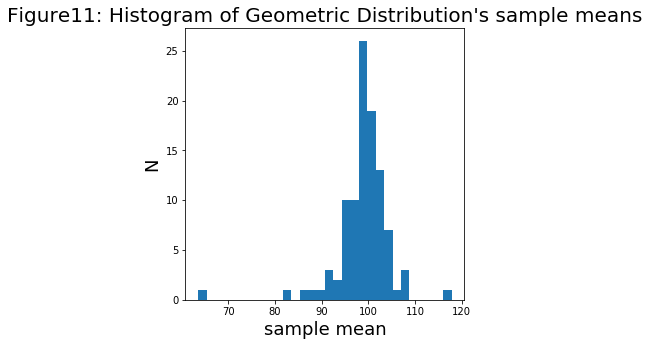

In [203]:
allmeans_geo = list(md['geo']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans_geo,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Figure11: Histogram of Geometric Distribution's sample means", fontsize = 20)

### Figure 11: This is a histogram of all the 100 Geometric Distribution's sample means. The distribution of these sample means tends to be a Normal Distribution.

# VI. Plot the distribution of all sample means

Text(0.5,1,"Figure12: Histogram of ALL Distribution's sample means")

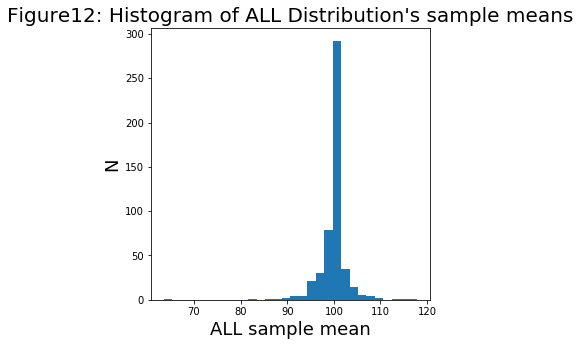

In [213]:
Allmeans = [allmeans_Chisq + allmeans_normal + allmeans_binomial + allmeans_pois + allmeans_geo]
pl.figure(figsize=(5, 5))
pl.hist(Allmeans,bins=30)
pl.xlabel('ALL sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Figure12: Histogram of ALL Distribution's sample means", fontsize = 20)

### Figure 12 : This is a histogram of all the 500 different 5 kinds of distributions' sample means. The distribution of these sample means tends to be a Normal Distribution. It follows the Central Limit Theorem.